In [2]:
from pprint import pprint
import sklearn.metrics
import autosklearn.classification
import timeit
import pandas as pd
from sklearn.model_selection import train_test_split


file_path = '../data/clean_data_lda.csv'
df = pd.read_csv(file_path)
df = df.dropna(subset=['Rating'])
y = df['Rating']
X = df.drop('Rating', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

time_budget = [30, 40, 60, 90, 120]
accuracy = []
precision = []
recall = []
leaderboard = []
config_list = []
for t in time_budget:
    accuracyi = []
    precisioni = []
    recalli = []
    for i in range(1):

        print("Time budget:", t)
        automl = autosklearn.classification.AutoSklearnClassifier(
        time_left_for_this_task=t,
        include = {
            'classifier': ["mlp"],
            'feature_preprocessor': ["no_preprocessing"]
        },
        tmp_folder="tmp/autosklearn_classification_example_tmp2",
        )

        automl.fit(X_train, y_train, dataset_name="airbnb")

        run_key = list(automl.automl_.runhistory_.data.keys())[0]
        run_value = automl.automl_.runhistory_.data[run_key]
        config=automl.automl_.runhistory_.ids_config[run_key.config_id]
        print("Config:", config)
        print("Leaderboard:", automl.leaderboard())
        config_list.append(str(config))
        leaderboard.append(str(automl.leaderboard()))

        predictions = automl.predict(X_test)
        # print("Accuracy score:", sklearn.metrics.accuracy_score(y_test, predictions))
        # print("Precision", sklearn.metrics.precision_score(y_test, predictions))
        # print("Recall", sklearn.metrics.recall_score(y_test, predictions))
        accuracyi.append(sklearn.metrics.accuracy_score(y_test, predictions))
        precisioni.append(sklearn.metrics.precision_score(y_test, predictions))
        recalli.append(sklearn.metrics.recall_score(y_test, predictions))
    accuracy.append(accuracyi)
    precision.append(precisioni)
    recall.append(recalli)

Time budget: 30


Fitting to the training data:   0%|          | 0/30 [00:00<?, ?it/s, The total time budget for this task is 0:00:30]/home/preethi/projects/hitlda-project/auto-sklearn/autosklearn/data/feature_validator.py:298: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(X[column]):


MLPP INITTT


Fitting to the training data:   3%|▎         | 1/30 [00:01<00:29,  1.00s/it, The total time budget for this task is 0:00:30]

[WARNING] [2023-11-29 11:35:44,442:Client-AutoMLSMBO(1)::airbnb] Configuration 546 not found
[WARNING] [2023-11-29 11:35:44,442:Client-AutoMLSMBO(1)::airbnb] Configuration 176 not found
[WARNING] [2023-11-29 11:35:44,443:Client-AutoMLSMBO(1)::airbnb] Configuration 476 not found
[WARNING] [2023-11-29 11:35:44,443:Client-AutoMLSMBO(1)::airbnb] Configuration 32 not found
[WARNING] [2023-11-29 11:35:44,443:Client-AutoMLSMBO(1)::airbnb] Configuration 601 not found
[WARNING] [2023-11-29 11:35:44,444:Client-AutoMLSMBO(1)::airbnb] Configuration 162 not found
[WARNING] [2023-11-29 11:35:44,444:Client-AutoMLSMBO(1)::airbnb] Configuration 220 not found
[WARNING] [2023-11-29 11:35:44,444:Client-AutoMLSMBO(1)::airbnb] Configuration 492 not found
[WARNING] [2023-11-29 11:35:44,445:Client-AutoMLSMBO(1)::airbnb] Configuration 440 not found
[WARNING] [2023-11-29 11:35:44,445:Client-AutoMLSMBO(1)::airbnb] Configuration 22 not found
[WARNING] [2023-11-29 11:35:44,445:Client-AutoMLSMBO(1)::airbnb] Configu

Fitting to the training data:   7%|▋         | 2/30 [00:02<00:28,  1.00s/it, The total time budget for this task is 0:00:30]

[WARNING] [2023-11-29 11:35:44,489:Client-AutoMLSMBO(1)::airbnb] Configuration 283 not found
[WARNING] [2023-11-29 11:35:44,489:Client-AutoMLSMBO(1)::airbnb] Configuration 14 not found
[WARNING] [2023-11-29 11:35:44,491:Client-AutoMLSMBO(1)::airbnb] Configuration 687 not found
[WARNING] [2023-11-29 11:35:44,491:Client-AutoMLSMBO(1)::airbnb] Configuration 357 not found
[WARNING] [2023-11-29 11:35:44,491:Client-AutoMLSMBO(1)::airbnb] Configuration 563 not found
[WARNING] [2023-11-29 11:35:44,492:Client-AutoMLSMBO(1)::airbnb] Configuration 608 not found
[WARNING] [2023-11-29 11:35:44,493:Client-AutoMLSMBO(1)::airbnb] Configuration 674 not found
[WARNING] [2023-11-29 11:35:44,493:Client-AutoMLSMBO(1)::airbnb] Configuration 382 not found
[WARNING] [2023-11-29 11:35:44,494:Client-AutoMLSMBO(1)::airbnb] Configuration 53 not found
[WARNING] [2023-11-29 11:35:44,494:Client-AutoMLSMBO(1)::airbnb] Configuration 160 not found
[WARNING] [2023-11-29 11:35:44,494:Client-AutoMLSMBO(1)::airbnb] Configu

Fitting to the training data: 100%|██████████| 30/30 [00:19<00:00,  1.56it/s, The total time budget for this task is 0:00:30]


Config: Configuration(values={
  'balancing:strategy': 'none',
  'classifier:__choice__': 'mlp',
  'classifier:mlp:activation': 'relu',
  'classifier:mlp:alpha': 0.0001,
  'classifier:mlp:batch_size': 'auto',
  'classifier:mlp:beta_1': 0.9,
  'classifier:mlp:beta_2': 0.999,
  'classifier:mlp:early_stopping': 'valid',
  'classifier:mlp:epsilon': 1e-08,
  'classifier:mlp:hidden_layer_depth': 5,
  'classifier:mlp:learning_rate_init': 0.001,
  'classifier:mlp:n_iter_no_change': 32,
  'classifier:mlp:num_nodes_per_layer': 256,
  'classifier:mlp:shuffle': 'True',
  'classifier:mlp:solver': 'adam',
  'classifier:mlp:tol': 0.0001,
  'classifier:mlp:validation_fraction': 0.1,
  'data_preprocessor:__choice__': 'feature_type',
  'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'mean',
  'data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__': 'standardize',
  'feature_preprocessor:__choice__': 'no_preprocessing',
})

Leaderboard:           rank  ense

/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/home/preethi/projects/hitlda-project/auto-sklearn/autosklearn/data/feature_validator.py:298: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(X[column]):
Fitting to the training data:   0%|          | 0/40 [00:00<?, ?it/s, The total time budget for this task is 0:00:40]

MLPP INITTT


Fitting to the training data:   2%|▎         | 1/40 [00:01<00:39,  1.00s/it, The total time budget for this task is 0:00:40]

[WARNING] [2023-11-29 11:36:08,843:Client-AutoMLSMBO(1)::airbnb] Configuration 546 not found
[WARNING] [2023-11-29 11:36:08,843:Client-AutoMLSMBO(1)::airbnb] Configuration 176 not found
[WARNING] [2023-11-29 11:36:08,844:Client-AutoMLSMBO(1)::airbnb] Configuration 476 not found
[WARNING] [2023-11-29 11:36:08,844:Client-AutoMLSMBO(1)::airbnb] Configuration 32 not found
[WARNING] [2023-11-29 11:36:08,844:Client-AutoMLSMBO(1)::airbnb] Configuration 601 not found
[WARNING] [2023-11-29 11:36:08,844:Client-AutoMLSMBO(1)::airbnb] Configuration 162 not found
[WARNING] [2023-11-29 11:36:08,844:Client-AutoMLSMBO(1)::airbnb] Configuration 220 not found
[WARNING] [2023-11-29 11:36:08,844:Client-AutoMLSMBO(1)::airbnb] Configuration 492 not found
[WARNING] [2023-11-29 11:36:08,845:Client-AutoMLSMBO(1)::airbnb] Configuration 440 not found
[WARNING] [2023-11-29 11:36:08,845:Client-AutoMLSMBO(1)::airbnb] Configuration 22 not found
[WARNING] [2023-11-29 11:36:08,845:Client-AutoMLSMBO(1)::airbnb] Configu

Fitting to the training data:   5%|▌         | 2/40 [00:02<00:38,  1.00s/it, The total time budget for this task is 0:00:40]

[WARNING] [2023-11-29 11:36:08,866:Client-AutoMLSMBO(1)::airbnb] Configuration 114 not found
[WARNING] [2023-11-29 11:36:08,866:Client-AutoMLSMBO(1)::airbnb] Configuration 595 not found
[WARNING] [2023-11-29 11:36:08,866:Client-AutoMLSMBO(1)::airbnb] Configuration 617 not found
[WARNING] [2023-11-29 11:36:08,866:Client-AutoMLSMBO(1)::airbnb] Configuration 129 not found
[WARNING] [2023-11-29 11:36:08,867:Client-AutoMLSMBO(1)::airbnb] Configuration 193 not found
[WARNING] [2023-11-29 11:36:08,867:Client-AutoMLSMBO(1)::airbnb] Configuration 237 not found
[WARNING] [2023-11-29 11:36:08,867:Client-AutoMLSMBO(1)::airbnb] Configuration 83 not found
[WARNING] [2023-11-29 11:36:08,867:Client-AutoMLSMBO(1)::airbnb] Configuration 131 not found
[WARNING] [2023-11-29 11:36:08,868:Client-AutoMLSMBO(1)::airbnb] Configuration 88 not found
[WARNING] [2023-11-29 11:36:08,868:Client-AutoMLSMBO(1)::airbnb] Configuration 422 not found
[WARNING] [2023-11-29 11:36:08,868:Client-AutoMLSMBO(1)::airbnb] Configu

Fitting to the training data: 100%|██████████| 40/40 [00:29<00:00,  1.37it/s, The total time budget for this task is 0:00:40]


Config: Configuration(values={
  'balancing:strategy': 'none',
  'classifier:__choice__': 'mlp',
  'classifier:mlp:activation': 'relu',
  'classifier:mlp:alpha': 0.0001,
  'classifier:mlp:batch_size': 'auto',
  'classifier:mlp:beta_1': 0.9,
  'classifier:mlp:beta_2': 0.999,
  'classifier:mlp:early_stopping': 'valid',
  'classifier:mlp:epsilon': 1e-08,
  'classifier:mlp:hidden_layer_depth': 5,
  'classifier:mlp:learning_rate_init': 0.001,
  'classifier:mlp:n_iter_no_change': 32,
  'classifier:mlp:num_nodes_per_layer': 256,
  'classifier:mlp:shuffle': 'True',
  'classifier:mlp:solver': 'adam',
  'classifier:mlp:tol': 0.0001,
  'classifier:mlp:validation_fraction': 0.1,
  'data_preprocessor:__choice__': 'feature_type',
  'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'mean',
  'data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__': 'standardize',
  'feature_preprocessor:__choice__': 'no_preprocessing',
})

Leaderboard:           rank  ense

/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/home/preethi/projects/hitlda-project/auto-sklearn/autosklearn/data/feature_validator.py:298: FutureWarning: is_sparse is deprecated and

MLPP INITTT


Fitting to the training data:   3%|▎         | 2/60 [00:02<00:58,  1.01s/it, The total time budget for this task is 0:01:00]

[WARNING] [2023-11-29 11:36:43,965:Client-AutoMLSMBO(1)::airbnb] Configuration 546 not found
[WARNING] [2023-11-29 11:36:43,966:Client-AutoMLSMBO(1)::airbnb] Configuration 176 not found
[WARNING] [2023-11-29 11:36:43,966:Client-AutoMLSMBO(1)::airbnb] Configuration 476 not found
[WARNING] [2023-11-29 11:36:43,966:Client-AutoMLSMBO(1)::airbnb] Configuration 32 not found
[WARNING] [2023-11-29 11:36:43,966:Client-AutoMLSMBO(1)::airbnb] Configuration 601 not found
[WARNING] [2023-11-29 11:36:43,967:Client-AutoMLSMBO(1)::airbnb] Configuration 162 not found
[WARNING] [2023-11-29 11:36:43,967:Client-AutoMLSMBO(1)::airbnb] Configuration 220 not found
[WARNING] [2023-11-29 11:36:43,967:Client-AutoMLSMBO(1)::airbnb] Configuration 492 not found
[WARNING] [2023-11-29 11:36:43,968:Client-AutoMLSMBO(1)::airbnb] Configuration 440 not found
[WARNING] [2023-11-29 11:36:43,968:Client-AutoMLSMBO(1)::airbnb] Configuration 22 not found
[WARNING] [2023-11-29 11:36:43,968:Client-AutoMLSMBO(1)::airbnb] Configu

Fitting to the training data:   5%|▌         | 3/60 [00:03<00:57,  1.01s/it, The total time budget for this task is 0:01:00]

[WARNING] [2023-11-29 11:36:44,011:Client-AutoMLSMBO(1)::airbnb] Configuration 237 not found
[WARNING] [2023-11-29 11:36:44,011:Client-AutoMLSMBO(1)::airbnb] Configuration 83 not found
[WARNING] [2023-11-29 11:36:44,012:Client-AutoMLSMBO(1)::airbnb] Configuration 131 not found
[WARNING] [2023-11-29 11:36:44,012:Client-AutoMLSMBO(1)::airbnb] Configuration 88 not found
[WARNING] [2023-11-29 11:36:44,013:Client-AutoMLSMBO(1)::airbnb] Configuration 422 not found
[WARNING] [2023-11-29 11:36:44,013:Client-AutoMLSMBO(1)::airbnb] Configuration 197 not found
[WARNING] [2023-11-29 11:36:44,014:Client-AutoMLSMBO(1)::airbnb] Configuration 37 not found
[WARNING] [2023-11-29 11:36:44,014:Client-AutoMLSMBO(1)::airbnb] Configuration 293 not found
[WARNING] [2023-11-29 11:36:44,014:Client-AutoMLSMBO(1)::airbnb] Configuration 378 not found
[WARNING] [2023-11-29 11:36:44,015:Client-AutoMLSMBO(1)::airbnb] Configuration 204 not found
[WARNING] [2023-11-29 11:36:44,015:Client-AutoMLSMBO(1)::airbnb] Configur

Fitting to the training data: 100%|██████████| 60/60 [00:52<00:00,  1.14it/s, The total time budget for this task is 0:01:00]


Config: Configuration(values={
  'balancing:strategy': 'none',
  'classifier:__choice__': 'mlp',
  'classifier:mlp:activation': 'relu',
  'classifier:mlp:alpha': 0.0001,
  'classifier:mlp:batch_size': 'auto',
  'classifier:mlp:beta_1': 0.9,
  'classifier:mlp:beta_2': 0.999,
  'classifier:mlp:early_stopping': 'valid',
  'classifier:mlp:epsilon': 1e-08,
  'classifier:mlp:hidden_layer_depth': 5,
  'classifier:mlp:learning_rate_init': 0.001,
  'classifier:mlp:n_iter_no_change': 32,
  'classifier:mlp:num_nodes_per_layer': 256,
  'classifier:mlp:shuffle': 'True',
  'classifier:mlp:solver': 'adam',
  'classifier:mlp:tol': 0.0001,
  'classifier:mlp:validation_fraction': 0.1,
  'data_preprocessor:__choice__': 'feature_type',
  'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'mean',
  'data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__': 'standardize',
  'feature_preprocessor:__choice__': 'no_preprocessing',
})

Leaderboard:           rank  ense

/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_s

MLPP INITTT


Fitting to the training data:   1%|          | 1/90 [00:01<01:29,  1.01s/it, The total time budget for this task is 0:01:30]

[WARNING] [2023-11-29 11:37:41,314:Client-AutoMLSMBO(1)::airbnb] Configuration 546 not found
[WARNING] [2023-11-29 11:37:41,314:Client-AutoMLSMBO(1)::airbnb] Configuration 176 not found
[WARNING] [2023-11-29 11:37:41,314:Client-AutoMLSMBO(1)::airbnb] Configuration 476 not found
[WARNING] [2023-11-29 11:37:41,314:Client-AutoMLSMBO(1)::airbnb] Configuration 32 not found
[WARNING] [2023-11-29 11:37:41,315:Client-AutoMLSMBO(1)::airbnb] Configuration 601 not found
[WARNING] [2023-11-29 11:37:41,315:Client-AutoMLSMBO(1)::airbnb] Configuration 162 not found
[WARNING] [2023-11-29 11:37:41,315:Client-AutoMLSMBO(1)::airbnb] Configuration 220 not found
[WARNING] [2023-11-29 11:37:41,315:Client-AutoMLSMBO(1)::airbnb] Configuration 492 not found
[WARNING] [2023-11-29 11:37:41,316:Client-AutoMLSMBO(1)::airbnb] Configuration 440 not found
[WARNING] [2023-11-29 11:37:41,316:Client-AutoMLSMBO(1)::airbnb] Configuration 22 not found
[WARNING] [2023-11-29 11:37:41,316:Client-AutoMLSMBO(1)::airbnb] Configu

Fitting to the training data:   2%|▏         | 2/90 [00:02<01:28,  1.01s/it, The total time budget for this task is 0:01:30]

[WARNING] [2023-11-29 11:37:41,327:Client-AutoMLSMBO(1)::airbnb] Configuration 108 not found
[WARNING] [2023-11-29 11:37:41,327:Client-AutoMLSMBO(1)::airbnb] Configuration 230 not found
[WARNING] [2023-11-29 11:37:41,328:Client-AutoMLSMBO(1)::airbnb] Configuration 506 not found
[WARNING] [2023-11-29 11:37:41,328:Client-AutoMLSMBO(1)::airbnb] Configuration 590 not found
[WARNING] [2023-11-29 11:37:41,328:Client-AutoMLSMBO(1)::airbnb] Configuration 206 not found
[WARNING] [2023-11-29 11:37:41,328:Client-AutoMLSMBO(1)::airbnb] Configuration 315 not found
[WARNING] [2023-11-29 11:37:41,329:Client-AutoMLSMBO(1)::airbnb] Configuration 680 not found
[WARNING] [2023-11-29 11:37:41,329:Client-AutoMLSMBO(1)::airbnb] Configuration 327 not found
[WARNING] [2023-11-29 11:37:41,329:Client-AutoMLSMBO(1)::airbnb] Configuration 668 not found
[WARNING] [2023-11-29 11:37:41,329:Client-AutoMLSMBO(1)::airbnb] Configuration 532 not found
[WARNING] [2023-11-29 11:37:41,330:Client-AutoMLSMBO(1)::airbnb] Confi

Fitting to the training data: 100%|██████████| 90/90 [01:21<00:00,  1.10it/s, The total time budget for this task is 0:01:30]


Config: Configuration(values={
  'balancing:strategy': 'none',
  'classifier:__choice__': 'mlp',
  'classifier:mlp:activation': 'relu',
  'classifier:mlp:alpha': 0.0001,
  'classifier:mlp:batch_size': 'auto',
  'classifier:mlp:beta_1': 0.9,
  'classifier:mlp:beta_2': 0.999,
  'classifier:mlp:early_stopping': 'valid',
  'classifier:mlp:epsilon': 1e-08,
  'classifier:mlp:hidden_layer_depth': 5,
  'classifier:mlp:learning_rate_init': 0.001,
  'classifier:mlp:n_iter_no_change': 32,
  'classifier:mlp:num_nodes_per_layer': 256,
  'classifier:mlp:shuffle': 'True',
  'classifier:mlp:solver': 'adam',
  'classifier:mlp:tol': 0.0001,
  'classifier:mlp:validation_fraction': 0.1,
  'data_preprocessor:__choice__': 'feature_type',
  'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'mean',
  'data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__': 'standardize',
  'feature_preprocessor:__choice__': 'no_preprocessing',
})

Leaderboard:           rank  ense

/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_s

Time budget: 120


/home/preethi/projects/hitlda-project/auto-sklearn/autosklearn/data/feature_validator.py:298: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(X[column]):
Fitting to the training data:   0%|          | 0/120 [00:00<?, ?it/s, The total time budget for this task is 0:02:00]

MLPP INITTT


Fitting to the training data:   1%|          | 1/120 [00:01<01:59,  1.00s/it, The total time budget for this task is 0:02:00]

[WARNING] [2023-11-29 11:39:08,742:Client-AutoMLSMBO(1)::airbnb] Configuration 546 not found
[WARNING] [2023-11-29 11:39:08,744:Client-AutoMLSMBO(1)::airbnb] Configuration 566 not found
[WARNING] [2023-11-29 11:39:08,742:Client-AutoMLSMBO(1)::airbnb] Configuration 176 not found
[WARNING] [2023-11-29 11:39:08,742:Client-AutoMLSMBO(1)::airbnb] Configuration 476 not found
[WARNING] [2023-11-29 11:39:08,742:Client-AutoMLSMBO(1)::airbnb] Configuration 32 not found
[WARNING] [2023-11-29 11:39:08,743:Client-AutoMLSMBO(1)::airbnb] Configuration 601 not found
[WARNING] [2023-11-29 11:39:08,743:Client-AutoMLSMBO(1)::airbnb] Configuration 162 not found
[WARNING] [2023-11-29 11:39:08,743:Client-AutoMLSMBO(1)::airbnb] Configuration 220 not found
[WARNING] [2023-11-29 11:39:08,743:Client-AutoMLSMBO(1)::airbnb] Configuration 492 not found
[WARNING] [2023-11-29 11:39:08,744:Client-AutoMLSMBO(1)::airbnb] Configuration 440 not found
[WARNING] [2023-11-29 11:39:08,744:Client-AutoMLSMBO(1)::airbnb] Config

Fitting to the training data:   2%|▏         | 2/120 [00:02<01:58,  1.00s/it, The total time budget for this task is 0:02:00]

[WARNING] [2023-11-29 11:39:08,760:Client-AutoMLSMBO(1)::airbnb] Configuration 67 not found
[WARNING] [2023-11-29 11:39:08,761:Client-AutoMLSMBO(1)::airbnb] Configuration 518 not found
[WARNING] [2023-11-29 11:39:08,761:Client-AutoMLSMBO(1)::airbnb] Configuration 251 not found
[WARNING] [2023-11-29 11:39:08,761:Client-AutoMLSMBO(1)::airbnb] Configuration 227 not found
[WARNING] [2023-11-29 11:39:08,761:Client-AutoMLSMBO(1)::airbnb] Configuration 414 not found
[WARNING] [2023-11-29 11:39:08,762:Client-AutoMLSMBO(1)::airbnb] Configuration 670 not found
[WARNING] [2023-11-29 11:39:08,762:Client-AutoMLSMBO(1)::airbnb] Configuration 576 not found
[WARNING] [2023-11-29 11:39:08,762:Client-AutoMLSMBO(1)::airbnb] Configuration 605 not found
[WARNING] [2023-11-29 11:39:08,762:Client-AutoMLSMBO(1)::airbnb] Configuration 444 not found
[WARNING] [2023-11-29 11:39:08,763:Client-AutoMLSMBO(1)::airbnb] Configuration 624 not found
[WARNING] [2023-11-29 11:39:08,763:Client-AutoMLSMBO(1)::airbnb] Config

Fitting to the training data:   2%|▎         | 3/120 [00:03<01:57,  1.00s/it, The total time budget for this task is 0:02:00]

[WARNING] [2023-11-29 11:39:08,792:Client-AutoMLSMBO(1)::airbnb] Configuration 553 not found
[WARNING] [2023-11-29 11:39:08,792:Client-AutoMLSMBO(1)::airbnb] Configuration 317 not found
[WARNING] [2023-11-29 11:39:08,792:Client-AutoMLSMBO(1)::airbnb] Configuration 171 not found
[WARNING] [2023-11-29 11:39:08,793:Client-AutoMLSMBO(1)::airbnb] Configuration 622 not found
[WARNING] [2023-11-29 11:39:08,793:Client-AutoMLSMBO(1)::airbnb] Configuration 304 not found
[WARNING] [2023-11-29 11:39:08,793:Client-AutoMLSMBO(1)::airbnb] Configuration 503 not found
[WARNING] [2023-11-29 11:39:08,793:Client-AutoMLSMBO(1)::airbnb] Configuration 543 not found
[WARNING] [2023-11-29 11:39:08,793:Client-AutoMLSMBO(1)::airbnb] Configuration 134 not found
[WARNING] [2023-11-29 11:39:08,794:Client-AutoMLSMBO(1)::airbnb] Configuration 58 not found
[WARNING] [2023-11-29 11:39:08,794:Client-AutoMLSMBO(1)::airbnb] Configuration 19 not found
[WARNING] [2023-11-29 11:39:08,794:Client-AutoMLSMBO(1)::airbnb] Configu

Fitting to the training data: 100%|██████████| 120/120 [01:51<00:00,  1.08it/s, The total time budget for this task is 0:02:00]


Config: Configuration(values={
  'balancing:strategy': 'none',
  'classifier:__choice__': 'mlp',
  'classifier:mlp:activation': 'relu',
  'classifier:mlp:alpha': 0.0001,
  'classifier:mlp:batch_size': 'auto',
  'classifier:mlp:beta_1': 0.9,
  'classifier:mlp:beta_2': 0.999,
  'classifier:mlp:early_stopping': 'valid',
  'classifier:mlp:epsilon': 1e-08,
  'classifier:mlp:hidden_layer_depth': 5,
  'classifier:mlp:learning_rate_init': 0.001,
  'classifier:mlp:n_iter_no_change': 32,
  'classifier:mlp:num_nodes_per_layer': 256,
  'classifier:mlp:shuffle': 'True',
  'classifier:mlp:solver': 'adam',
  'classifier:mlp:tol': 0.0001,
  'classifier:mlp:validation_fraction': 0.1,
  'data_preprocessor:__choice__': 'feature_type',
  'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'mean',
  'data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__': 'standardize',
  'feature_preprocessor:__choice__': 'no_preprocessing',
})

Leaderboard:           rank  ense

/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_s

In [3]:
print(accuracy)
print(precision)
print(recall)
# print(config_list)
# print(leaderboard)

[[0.8], [0.79], [0.8], [0.82], [0.82]]
[[0.782608695652174], [0.7307692307692307], [0.76], [0.8260869565217391], [0.7777777777777778]]
[[0.5454545454545454], [0.5757575757575758], [0.5757575757575758], [0.5757575757575758], [0.6363636363636364]]


Text(0.5, 0, 'Time Budget')

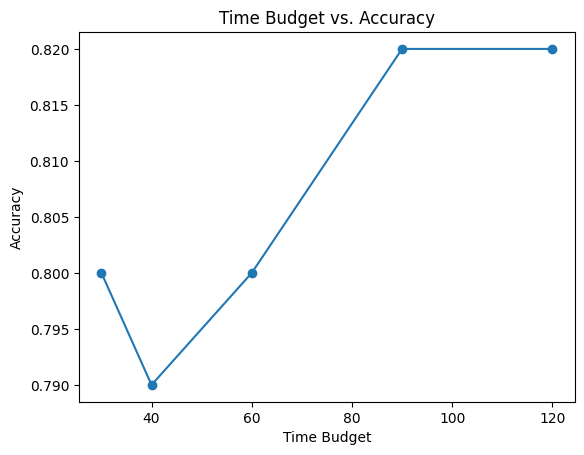

In [5]:
import matplotlib.pyplot as plt

# plt.subplot(2, 2, 1)
plt.plot(time_budget, accuracy, marker='o')
plt.title('Time Budget vs. Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Time Budget')

Text(0.5, 0, 'Time Budget')

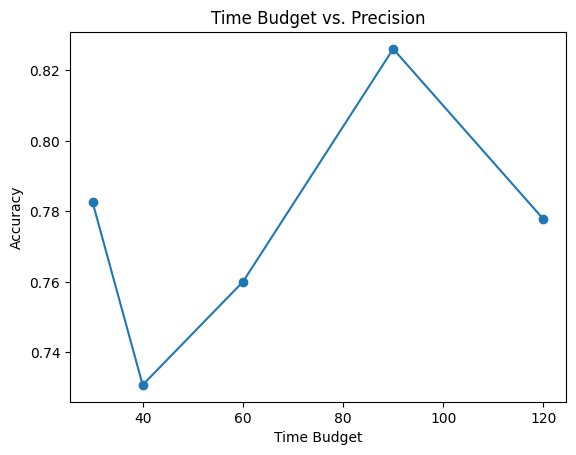

In [6]:
import matplotlib.pyplot as plt

# plt.subplot(2, 2, 1)
plt.plot(time_budget, precision, marker='o')
plt.title('Time Budget vs. Precision')
plt.ylabel('Accuracy')
plt.xlabel('Time Budget')

Text(0.5, 0, 'Time Budget')

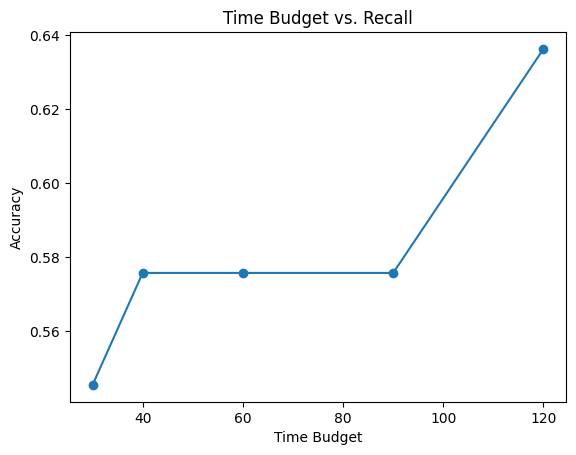

In [7]:
import matplotlib.pyplot as plt

# plt.subplot(2, 2, 1)
plt.plot(time_budget, recall, marker='o')
plt.title('Time Budget vs. Recall')
plt.ylabel('Accuracy')
plt.xlabel('Time Budget')